In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread ('dataset/cristiano_ronaldo/0_PA-60369535.jpg')
img.shape

(409, 615, 3)

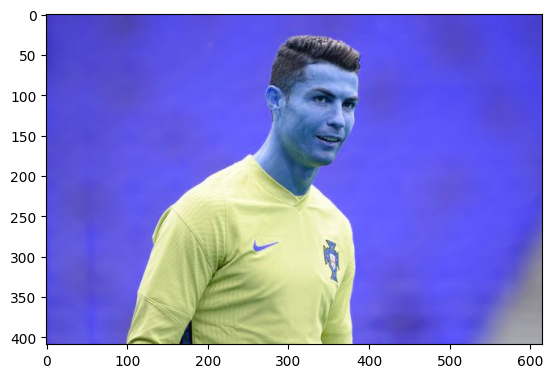

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(409, 615)

In [5]:
gray

array([[ 96,  97,  98, ..., 106, 106, 106],
       [ 96,  97,  98, ..., 106, 106, 106],
       [ 96,  97,  98, ..., 106, 106, 106],
       ...,
       [116, 116, 117, ..., 172, 171, 171],
       [116, 116, 117, ..., 171, 171, 171],
       [115, 115, 116, ..., 171, 170, 170]], dtype=uint8)

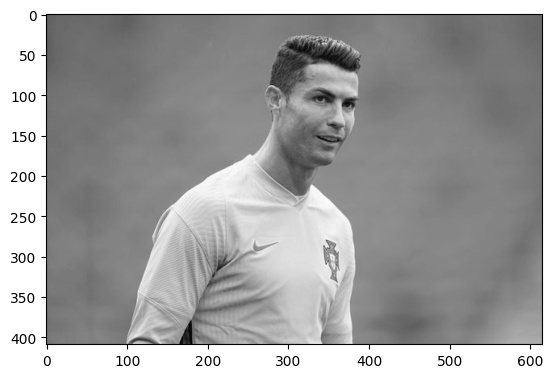

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[292,  62, 123, 123]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(292, 62, 123, 123)

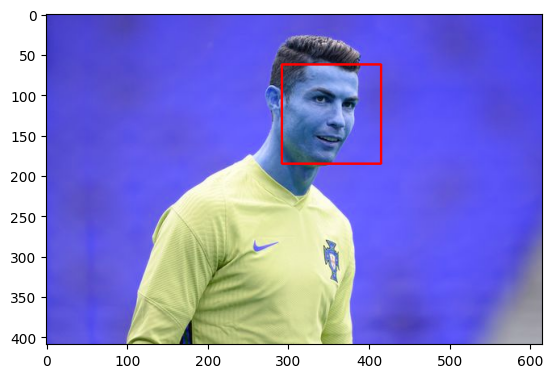

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

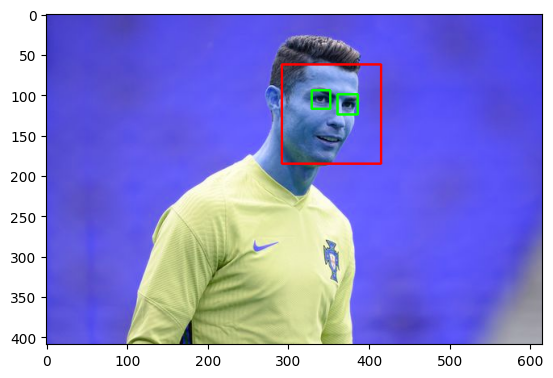

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+h]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

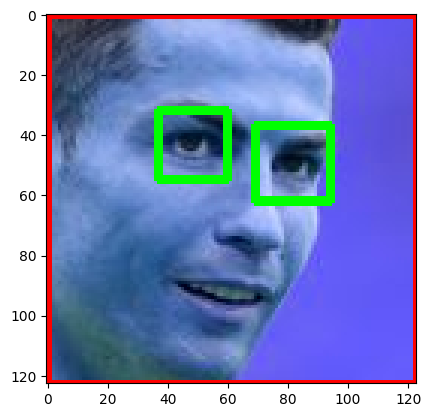

In [11]:
%matplotlib inline 
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    if img is not None:
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            roi_gray=gray[y:y+h,x:x+w]
            roi_color=img[y:y+h,x:x+w]
            eyes=eye_cascade.detectMultiScale(roi_gray)
            if len(eyes)>=2:
                return roi_color

lets try for one image

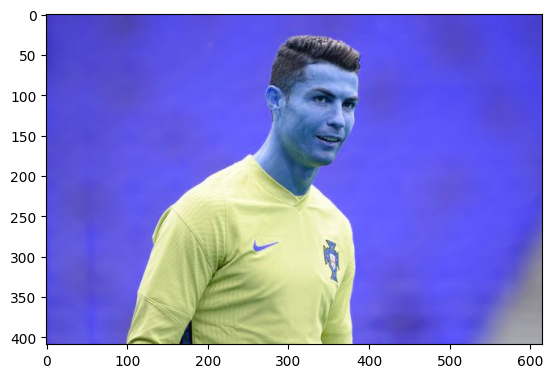

In [13]:
orignal_image=cv2.imread('dataset/cristiano_ronaldo/0_PA-60369535.jpg')
plt.imshow(orignal_image)

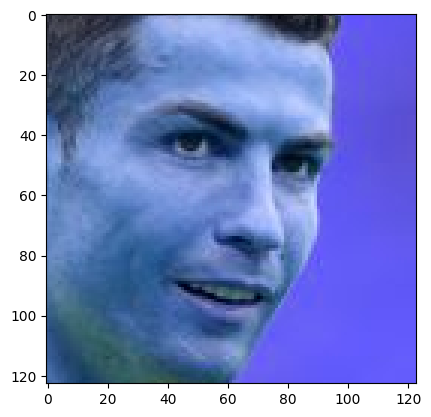

In [14]:
cropped_image = get_cropped_image_if_2_eyes('dataset/cristiano_ronaldo/0_PA-60369535.jpg')
plt.imshow(cropped_image)

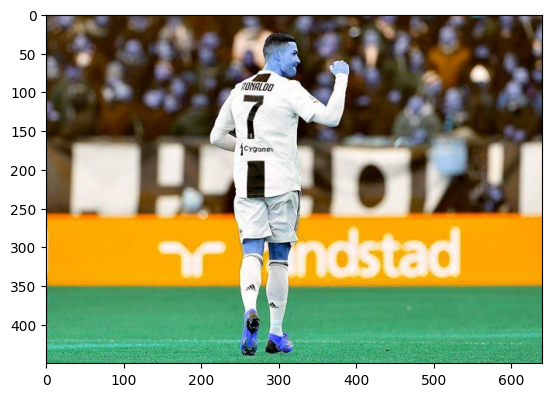

In [15]:
org_image_obstructed=cv2.imread('dataset/cristiano_ronaldo/1546409679-Ronaldo-back-7-Juventus-AP.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('dataset/cristiano_ronaldo/1546409679-Ronaldo-back-7-Juventus-AP.jpg')
cropped_image_no_2_eyes

FROM here on we will create a folder for each cropped faces

In [17]:
path_to_data='dataset'
path_to_cr_data='dataset/cropped/'

In [18]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['dataset\\cristiano_ronaldo',
 'dataset\\cropped',
 'dataset\\elon_musk',
 'dataset\\john_cena',
 'dataset\\leonel_messi',
 'dataset\\narendra_modi',
 'dataset\\neeraj_chopra',
 'dataset\\putin',
 'dataset\\rameshbabu_praggnanandhaa',
 'dataset\\sunil_chettri',
 'dataset\\thalapathy_vijay',
 'dataset\\virat_kohli']

if there is no cropped folder then a cropped folder will be added

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('\\')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data +celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder : ",cropped_folder)

            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

cristiano_ronaldo
Generating cropped images in folder :  dataset/cropped/cristiano_ronaldo
cropped
elon_musk
Generating cropped images in folder :  dataset/cropped/elon_musk
john_cena
Generating cropped images in folder :  dataset/cropped/john_cena
leonel_messi
Generating cropped images in folder :  dataset/cropped/leonel_messi
narendra_modi
Generating cropped images in folder :  dataset/cropped/narendra_modi
neeraj_chopra
Generating cropped images in folder :  dataset/cropped/neeraj_chopra
putin
Generating cropped images in folder :  dataset/cropped/putin
rameshbabu_praggnanandhaa
Generating cropped images in folder :  dataset/cropped/rameshbabu_praggnanandhaa
sunil_chettri
Generating cropped images in folder :  dataset/cropped/sunil_chettri
thalapathy_vijay
Generating cropped images in folder :  dataset/cropped/thalapathy_vijay
virat_kohli
Generating cropped images in folder :  dataset/cropped/virat_kohli


from here we will make a wavelet img of the image and combine it with the orignal

After manually deleting images from the cropped folder, rename the images

In [27]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'cristiano_ronaldo': ['dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo100.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo101.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo102.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo103.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo104.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo105.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo106.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo107.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo108.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo109.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo110.png',
  'dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo111.png',
  'datas

In [28]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)

    return imArray_H

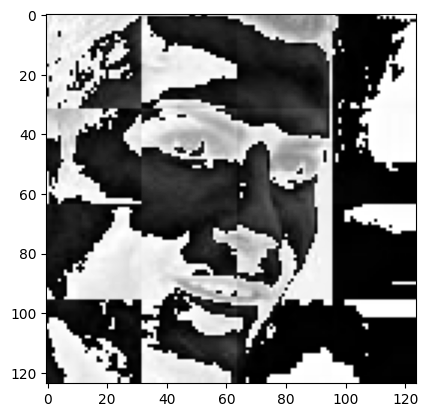

In [29]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [33]:
class_dict={}
count =0
for celebrity_name in celebrity_file_names_dict.keys():
    if celebrity_name=='cropped':
        continue
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'cristiano_ronaldo': 0,
 'elon_musk': 1,
 'john_cena': 2,
 'leonel_messi': 3,
 'narendra_modi': 4,
 'neeraj_chopra': 5,
 'putin': 6,
 'rameshbabu_praggnanandhaa': 7,
 'sunil_chettri': 8,
 'thalapathy_vijay': 9,
 'virat_kohli': 10}

In [34]:
X=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [35]:
len(X[0])

4096

In [36]:
X[0]

array([[54],
       [55],
       [67],
       ...,
       [ 1],
       [ 0],
       [ 0]], dtype=uint8)

In [37]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1437, 4096)

In [38]:
X[0]

array([54., 55., 67., ...,  1.,  0.,  0.])

model/dataset/cropped/cristiano_ronaldo
model/dataset/cristiano_ronaldo

Data cleaning  process is done. Now training begins
We will use SVM with rbf kernel tuned with heuristic finetuning

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.85

In [42]:
len(X_test)

360

In [43]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.78      0.79        40
           1       0.80      0.98      0.88        84
           2       1.00      0.60      0.75        20
           3       0.90      0.79      0.84        33
           4       0.87      0.87      0.87        15
           5       0.85      0.94      0.89        36
           6       1.00      0.83      0.91        18
           7       0.96      0.93      0.95        29
           8       0.67      0.76      0.71        21
           9       0.92      0.74      0.82        31
          10       0.84      0.82      0.83        33

    accuracy                           0.85       360
   macro avg       0.88      0.82      0.84       360
weighted avg       0.86      0.85      0.85       360



Lets use GridSearch CV to try out different models with different parameters.Goal  is to come up with best model and best fine tuned parameters

In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# ()  3 %  ! @

In [49]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [50]:
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_

df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Pytho

,model,best_score,best_params
0,svm,0.856064,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.630504,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.834720,{'logisticregression__C': 1}


In [51]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [52]:
best_estimators['svm'].score(X_test,y_test)

0.8805555555555555

In [53]:
best_estimators['random_forest'].score(X_test,y_test)

0.6555555555555556

In [54]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8472222222222222

In [55]:
best_clf=best_estimators['svm']

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[32,  0,  1,  2,  0,  0,  0,  0,  5,  0,  0],
       [ 4, 79,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  4, 14,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 1,  2,  0, 28,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  1,  0,  0, 13,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 33,  0,  1,  1,  0,  0],
       [ 0,  3,  0,  0,  0,  0, 15,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 27,  3],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  1, 31]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

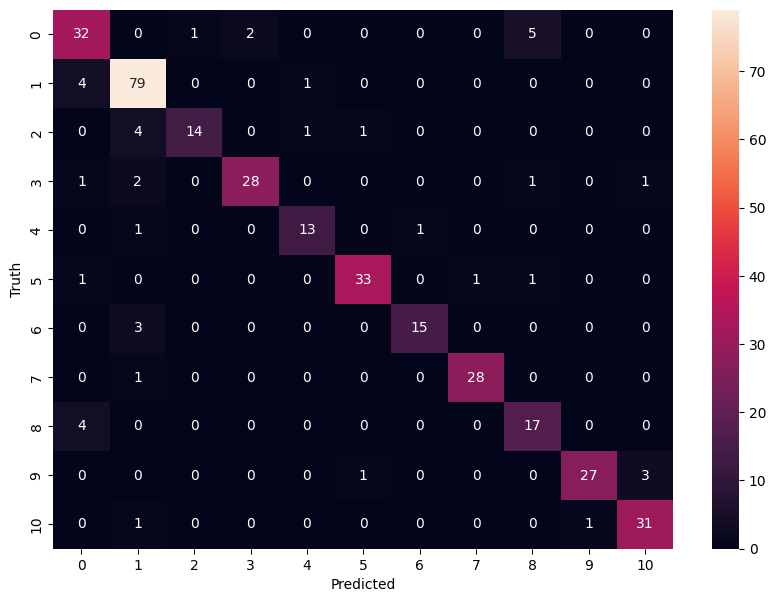

In [57]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
class_dict

{'cristiano_ronaldo': 0,
 'elon_musk': 1,
 'john_cena': 2,
 'leonel_messi': 3,
 'narendra_modi': 4,
 'neeraj_chopra': 5,
 'putin': 6,
 'rameshbabu_praggnanandhaa': 7,
 'sunil_chettri': 8,
 'thalapathy_vijay': 9,
 'virat_kohli': 10}

**Save trained model**

In [61]:
import joblib
# save the model as a pickel in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

**Save class dictionary**

In [62]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))